# 波动率分析

In [2]:
import os
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("bmh")

读取数据

In [6]:
def read_binance_annual_ohlcv(year: int) -> pd.DataFrame:
    filepath = os.path.join("../data", f"binance_daily_ohlcv_{year}.csv")
    return pd.read_csv(filepath, index_col="timestamp", parse_dates=True)


years = [2022, 2023, 2024]
ohlcv = pd.concat((read_binance_annual_ohlcv(year) for year in years))

ohlcv

,open,high,low,close,volume,symbol
timestamp,,,,,,
2022-01-01,46216.9300,47954.6300,46208.3700,47722.6500,1.960446e+04,BTC/USDT
2022-01-02,47722.6600,47990.0000,46654.0000,47286.1800,1.834046e+04,BTC/USDT
2022-01-03,47286.1800,47570.0000,45696.0000,46446.1000,2.766208e+04,BTC/USDT
2022-01-04,46446.1000,47557.5400,45500.0000,45832.0100,3.549141e+04,BTC/USDT
2022-01-05,45832.0100,47070.0000,42500.0000,43451.1300,5.178412e+04,BTC/USDT
...,...,...,...,...,...,...
2024-04-05,0.2961,0.2989,0.2780,0.2936,9.776790e+06,BAT/USDT
2024-04-06,0.2936,0.2991,0.2918,0.2964,3.313721e+06,BAT/USDT
2024-04-07,0.2963,0.3030,0.2954,0.3023,5.018225e+06,BAT/USDT


计算历史标准差

- 选择货币对和样本
- 根据价格或者收益率来计算波动率
- 画波动率图

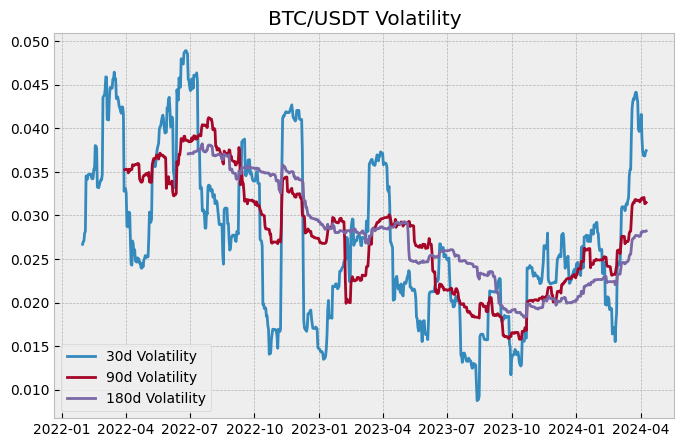

In [12]:
# 设置参数
ticker = "BTC/USDT"
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2024, 4, 30)
price_volatility = False  # True if you want to calculate price volatility, False if you want return volatility

# 选择数据
ohlcv_ticker = ohlcv.query("symbol == @ticker").loc[start_date:end_date].copy()
ohlcv_ticker["daily_return"] = ohlcv_ticker["close"].pct_change().fillna(0)
series = ohlcv_ticker["close"] if price_volatility else ohlcv_ticker["daily_return"]

# 计算不同滚动窗口的波动率
vol_30d = series.rolling(window=30).std()
vol_90d = series.rolling(window=90).std()
vol_180d = series.rolling(window=180).std()

# 数据可视化
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(vol_30d, label="30d Volatility")
ax.plot(vol_90d, label="90d Volatility")
ax.plot(vol_180d, label="180d Volatility")
ax.set_title(f"{ticker} Volatility")
_ = ax.legend()